<a href="https://colab.research.google.com/github/SUSMITHA-BYPO/BigMartSalesPrediction/blob/main/BigMartSales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries

In [122]:
#numpy is useful to work with the arrays in python
import numpy as np
# pandas are useful for creating data frames for the given data.As the data is taken in a csv file
# it's difficult to analyse so taken pandas to create dataframe.
import pandas as pd
# for data visualisation through plots and graphs we use the matplotlib libraies
import matplotlib.pyplot as plt
#seaborn is a visualisation library which is top of matplotlib and it is used to make statistical graphs and plots
import seaborn as sns


In [123]:
#sklearn is a important library which is used to get the several functions and preprocessing models for the data
#LabelEncoder is used to convert the categorical columns into Numerical form
from sklearn.preprocessing import LabelEncoder

Model Selection Library

In [124]:
#model selection is used to select a particular model to train the data
#train_test_split is a function of model_selection which is used to split the data into training and testing categories.
from sklearn.model_selection import train_test_split

Import Model

In [125]:
#here in big mart sales data we use model called xgboost and from that we import XGBoostRegressor
#xgboost is a ensemeble method which combines multiple models to have more accuracy in prediction. xgboost model can be used for both classification
#and regression. xgboost means Extreme Gradient Boosting which is very fast.
#xgboost decreases the bias , prevents overfitting(works well with testing data), handle missing values automatically
#and parallel processing is done(run parallely in cluster of computers)
from xgboost import XGBRegressor
#XGBRegressor predict the categorical values for columns.

In [126]:
#metrics is a function of sklearn which is used to calculate the performance of the model.
from sklearn import metrics

Data Collection And Analysis

In [127]:
#load csv file into dataframe of pandas
#data frame is created to have the data in more structured format
big_mart_data = pd.read_csv('/content/Train.csv')

In [128]:
# head is used to print first 5 rows of data
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [129]:
#Item type,outlet size ... are the text data or categorical which cannot be trained to model so we need to convert them to numerical data.
#no.of data points and no.of features represent rows and columns
#this can be calculated using shape
big_mart_data.shape

(8523, 12)

In [130]:
#to get the brief information about the data we can use info function to get the type of data stored.
big_mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


**Categorical values:**
1. Item_Identifier
2. Item_Fat_Content
3. Item_Type
4. Outlet_Identifier
5. Outlet_Size
6. Outlet_Location_Type
7. Outlet_Type

**We need to perform the analysis on the categorical and then feed to model.**

In [131]:
#Check the missing values
#isnull() is a function which is used to check whether null values present or not
#sum() will add up all the null values as it is used after isnull()
#so here we have missing values in Item_Weight and Outlet_Size
big_mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

**Handling missing values:**
1. Finding mean for numerical data
2. FInding mode for categorical data


In [132]:
#mean for item_weight column
big_mart_data['Item_Weight'].mean()

12.857645184135976

In [133]:
#fill the missing values with the mean value
#fillna is used to fill the missing values with some values
#inplace = True is used to store the updated values in the original data if inplace is false then it doesnot replace the missing values in original dataset.
big_mart_data['Item_Weight'].fillna(big_mart_data['Item_Weight'].mean(),inplace = True)

In [134]:
big_mart_data['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [135]:
#now check no.of missing values in Item_Weight column after assigning
big_mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

**Replacing missing values of Outlet_Size with the mode**

In [136]:
#now handle missing values of Outlet_Size with mode
#pivot_table is used to create a spread sheet for the selected rows and columns
#here we took outlet_type in columns as it has no missing values and is correlated with the outlet_size
#aggfunc means aggregate function that is used on the grouped data
#lambda func in pivot_table calculates the percentage of column in each row
mode_of_outlet_size = big_mart_data.pivot_table(values = "Outlet_Size",columns= "Outlet_Type",aggfunc= (lambda x: x.mode()[0]))


In [137]:
print(mode_of_outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


Now this outlet_type having missing values are replaced with the mode_of_outlet_size at respective type.

In [138]:
missing_values = big_mart_data['Outlet_Size'].isnull() #finding missing values
print(missing_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [139]:
#replacing all missing values with mode of data
#loc is used to locate the values or updating values
#here missing_values are replaced with outlet_size based on outlet_type and mode
big_mart_data.loc[missing_values,'Outlet_Size'] = big_mart_data.loc[missing_values,'Outlet_Type'].apply(lambda x: mode_of_outlet_size[x])

In [140]:
big_mart_data['Outlet_Size'].isnull().sum()

0

In [141]:
big_mart_data['Outlet_Size'].fillna(big_mart_data['Outlet_Size'].mode(),inplace = True)

In [142]:
big_mart_data['Outlet_Size'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [143]:
#again check for the missing values in the data
big_mart_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Now all missing values are cleared

**Data Analysis**

In [144]:
# Describe gives the statistical measures for the numerical data (like count, mean, min ...)
big_mart_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Numerical Features:

In [145]:
#sns.set() is used for to get the grids and plots for the statistical data
sns.set()

<ipython-input-146-db1e83d1cb4b>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Item_Weight'])


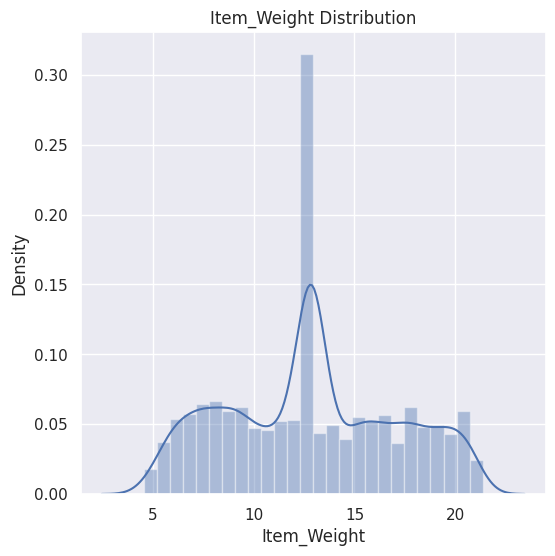

In [146]:
#Let's understand the distribution of column Item_Weight
#plt.figure is a method which is used to give the plot dimensions in x-axis and y-axis using figsize
plt.figure(figsize = (6,6)) #x-axis = 6, y-axis =6
#draw a distribution plot using sns for Item_Weight
#distplot is depricated in future but it gives a graph which makes easier to identify the max distributed values
sns.distplot(big_mart_data['Item_Weight'])
plt.title("Item_Weight Distribution")
#plt.show() is used to display all the figures
plt.show()

<ipython-input-147-dcc00ce4b188>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Item_Visibility'])


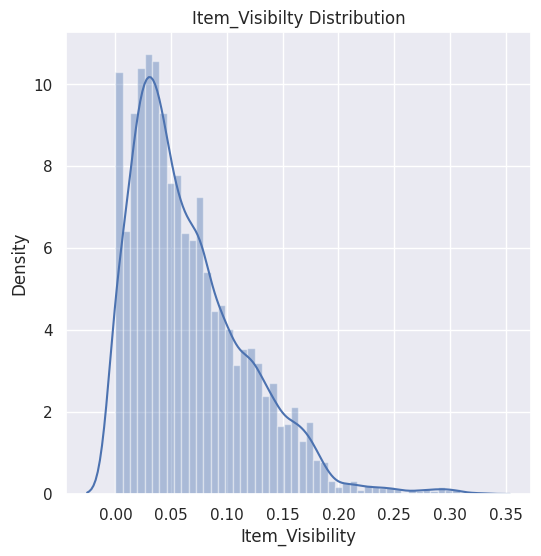

In [147]:
#plot for Item_Visibility
plt.figure(figsize = (6,6))
sns.distplot(big_mart_data['Item_Visibility'])
plt.title("Item_Visibilty Distribution")
plt.show()

<ipython-input-148-0b7f4c30c7ef>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Item_MRP'])


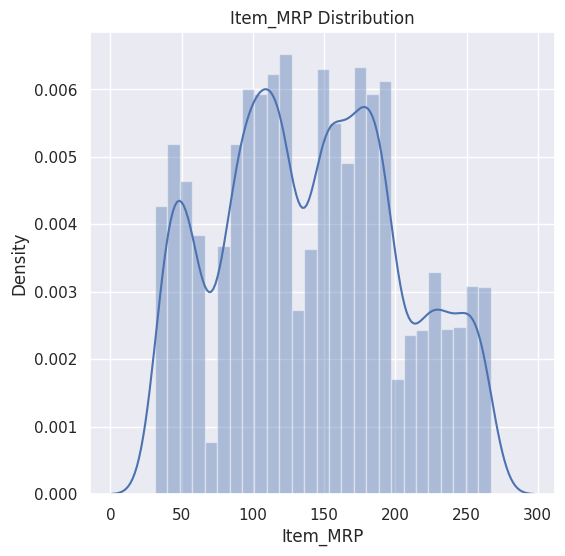

In [148]:
#plot for Item_MRP
plt.figure(figsize = (6,6))
sns.distplot(big_mart_data['Item_MRP'])
plt.title("Item_MRP Distribution")
plt.show()

<ipython-input-149-d2fe0d450e27>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Item_Outlet_Sales'])


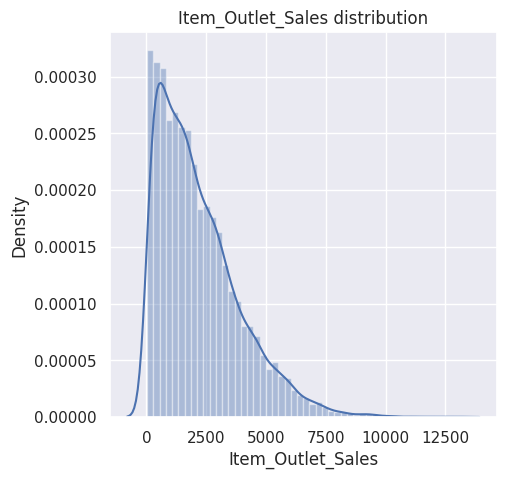

In [149]:
#Distribution of Item_Outlet_Sales
plt.figure(figsize = (5,5))
sns.distplot(big_mart_data['Item_Outlet_Sales'])
plt.title("Item_Outlet_Sales distribution")
plt.show()

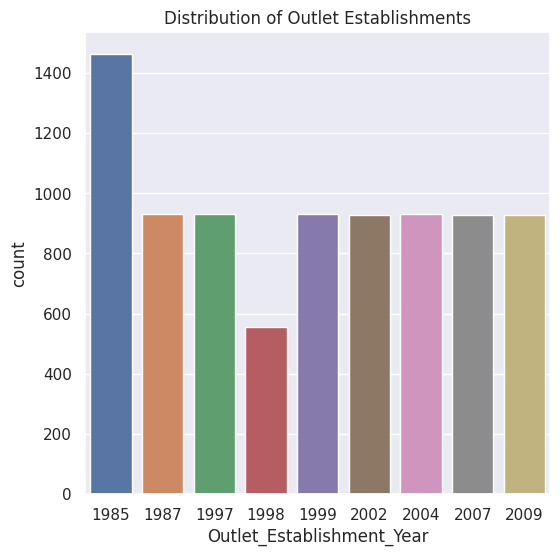

In [150]:
#Outlet_Establishment_Year is numerical feature which gives better predictions using count plot than distplot
plt.figure(figsize = (6,6))
sns.countplot(x = 'Outlet_Establishment_Year',data = big_mart_data)
plt.title("Distribution of Outlet Establishments")
plt.show()

<ipython-input-151-8266918906f8>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Outlet_Establishment_Year'])


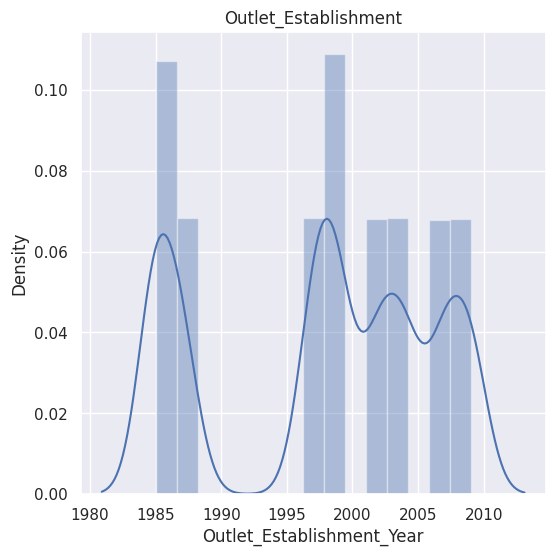

In [151]:
#distplot for Outlet_Establishment
plt.figure(figsize = (6,6))
sns.distplot(big_mart_data['Outlet_Establishment_Year'])
plt.title("Outlet_Establishment")
plt.show()

**Categorical features distribution:**
we dont find any plots for the Item_Identifier and Outlet_Identifier because they just represent some id but no use for distrubution purpose

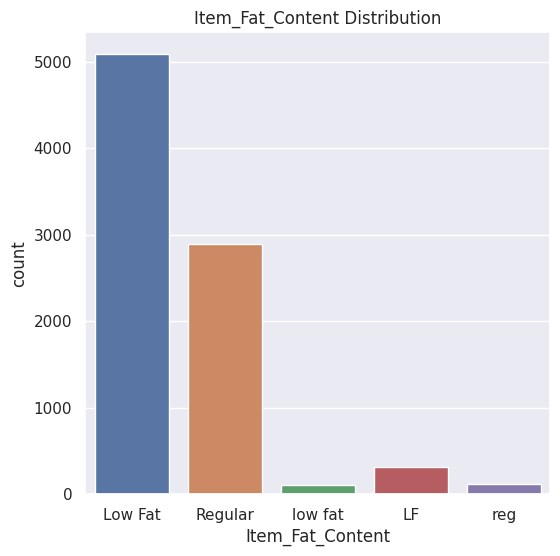

In [152]:
#count plot is used for categorical values as it is to analyse the data
#Item_Fat_Content distribution
plt.figure(figsize = (6,6))
sns.countplot(x = 'Item_Fat_Content',data = big_mart_data)
plt.title("Item_Fat_Content Distribution")
plt.show()

In the above plot Low Fat, low fat and LF comes under same category and Regular and reg are same so we need to clean the data to distribute the data into two columns Low Fat and Regular.

In [153]:
#conversion of low fat , lf into Low Fat and reg to Regular
big_mart_data.replace({'Item_Fat_Content' : {'low fat' :'Low Fat','LF' :'Low Fat','reg':'Regular'}},inplace = True)

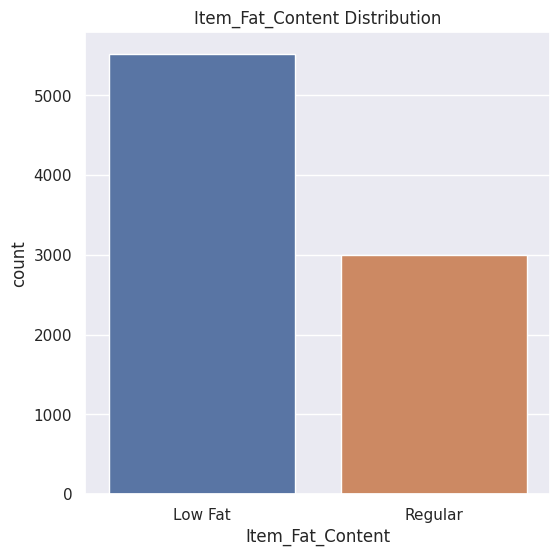

In [154]:
#modified distribution of Item_Fat_Content
plt.figure(figsize =(6,6))
sns.countplot(x='Item_Fat_Content',data =big_mart_data)
plt.title("Item_Fat_Content Distribution")
plt.show()

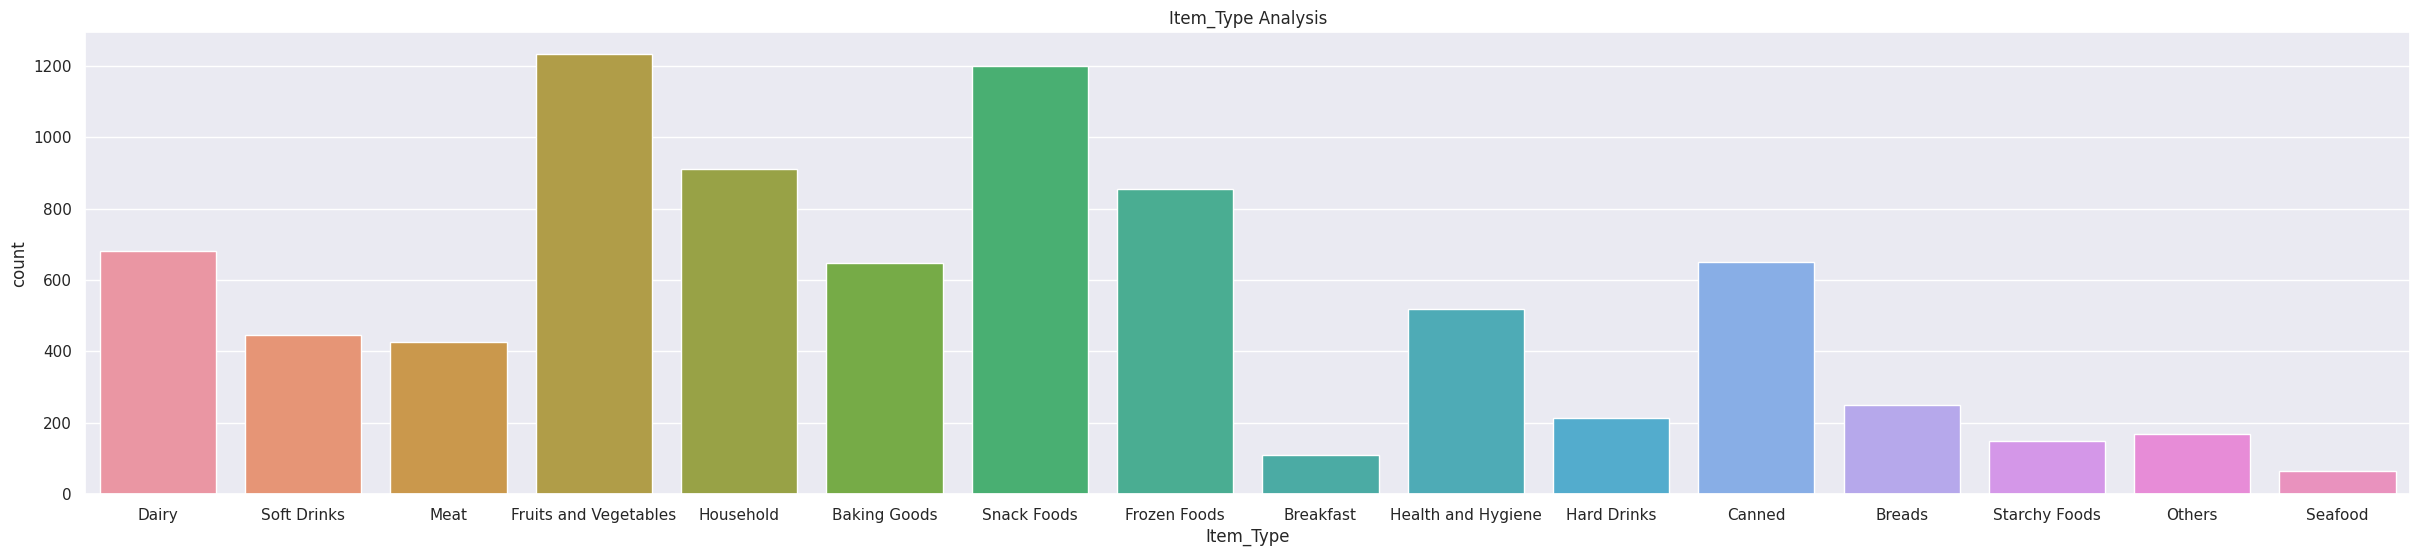

In [155]:
#Distribution for Item_Type
plt.figure(figsize = (30,6))
sns.countplot(x = 'Item_Type',data = big_mart_data)
plt.title("Item_Type Analysis")
plt.show()

<Axes: xlabel='Outlet_Size', ylabel='count'>

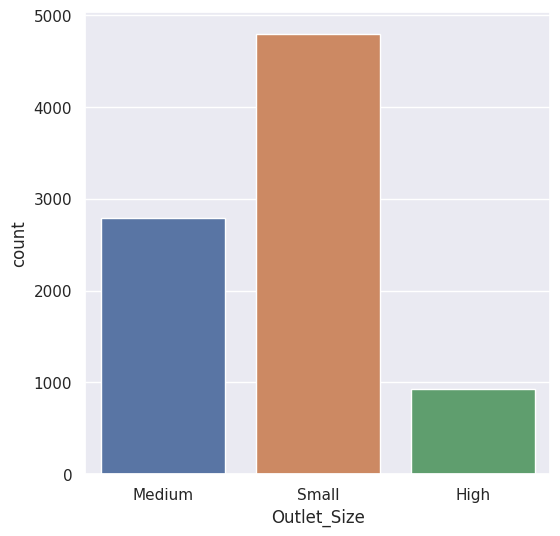

In [156]:
plt.figure(figsize = (6,6))
sns.countplot(x='Outlet_Size',data = big_mart_data)

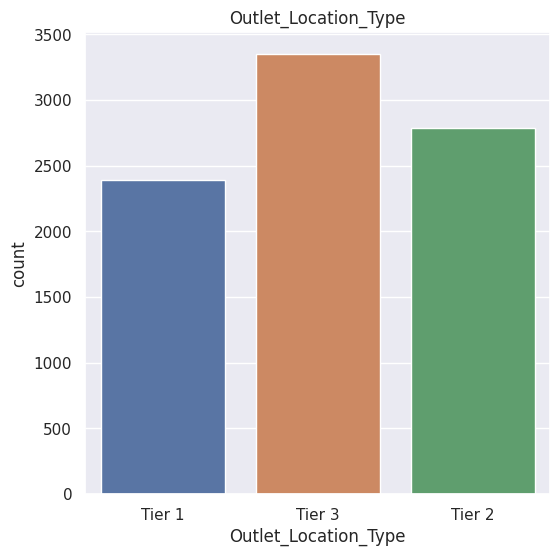

In [157]:
#Outlet_Location_Type Distribution
plt.figure(figsize = (6,6))
sns.countplot(x='Outlet_Location_Type',data=big_mart_data)
plt.title("Outlet_Location_Type")
plt.show()

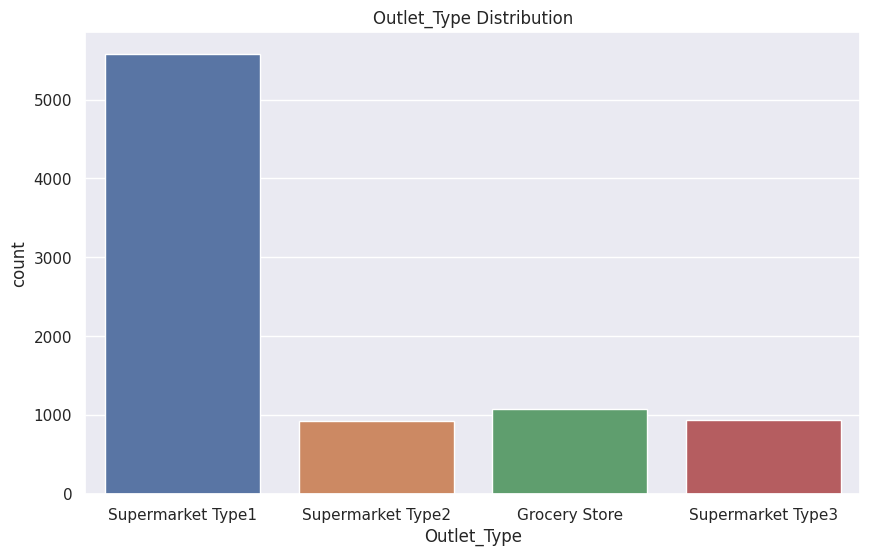

In [158]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'Outlet_Type',data = big_mart_data)
plt.title("Outlet_Type Distribution")
plt.show()

**Data Pre-Processing:**

**Converting all the Categorical data into Numerical Data**

In [159]:
#here we are using label encoder method to convert the categorical to numerical values
#LabelEncoder is assigned to encoder
#fit_transform will convert the values

encoder = LabelEncoder()
big_mart_data['Item_Identifier'] = encoder.fit_transform(big_mart_data['Item_Identifier'])
big_mart_data['Item_Fat_Content']= encoder.fit_transform(big_mart_data['Item_Fat_Content'])
big_mart_data['Item_Type'] = encoder.fit_transform(big_mart_data['Item_Type'])
big_mart_data['Outlet_Identifier'] = encoder.fit_transform(big_mart_data['Outlet_Identifier'])
big_mart_data['Outlet_Size'] = encoder.fit_transform(big_mart_data['Outlet_Size'])
big_mart_data['Outlet_Location_Type'] = encoder.fit_transform(big_mart_data['Outlet_Location_Type'])
big_mart_data['Outlet_Type'] = encoder.fit_transform(big_mart_data['Outlet_Type'])

In [160]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


**Splitting Features And Target**
1. target is : Item_Outlet_Sales
2. Remaining all are features

In [161]:
x = big_mart_data.drop(columns = 'Item_Outlet_Sales',axis = 1) #for columns axis =1, for rows axis =0
y = big_mart_data['Item_Outlet_Sales'] #storing Target Values

In [162]:
print(x)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 0         0.016047   
1                   8        5.920                 1         0.019278   
2                 662       17.500                 0         0.016760   
3                1121       19.200                 1         0.000000   
4                1297        8.930                 0         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865                 0         0.056783   
8519              897        8.380                 1         0.046982   
8520             1357       10.600                 0         0.035186   
8521              681        7.210                 1         0.145221   
8522               50       14.800                 0         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4  249.8092                  9    

In [163]:
print(y)

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64


**Splitting of data into training data and testing data:**

In [164]:
#we need four arrays for training and testing
#x_train stores the training data of features, x_test stores the testing data of features
#y_train stores the training set of target, y_test stores the test set of target
#test_size represents the percentage of data split into testing set which is 20% here
#random_state will control the shuffling process in data where the number assigned will take up different sets for training and testing
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 2)

In [165]:
#checking the numerical value of the splitted data
print(x.shape,x_train.shape,x_test.shape)

(8523, 11) (6818, 11) (1705, 11)


**Training Machine Learning Model**

**XGBoostRegressor**

In [114]:
#Assigning XGBRegressor to regressor variable
#regressor.fit(x_train,y_train) will identify the patterns/Relationships between the x and y
regressor = XGBRegressor()
regressor.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

**Evaluation**

In [166]:
#predicting training data
#predict function is used to predict the data
training_data_prediction = regressor.predict(x_train)

In [167]:
#calculate r squared value to evaluate overall performance
#r square value ranges from 0 to 1
#in most cases if r2 is near to 1 then regressor is doing well but it all depends on the data we take because some time if r2 square is less also it work fine.
r2_train = metrics.r2_score(y_train,training_data_prediction)

In [168]:
print('R2 train value is : ',r2_train)

R2 train value is :  0.8639680373364909


In [169]:
#testing data evaluation
testing_data_prediction = regressor.predict(x_test)
r2_test = metrics.r2_score(y_test,testing_data_prediction)
print('R2 test value is : ',r2_test)

R2 test value is :  0.5233136709735687
